<a href="https://colab.research.google.com/github/Zabrooo1/Clinica/blob/main/Copia_de_Preparacion_Datos_CSGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

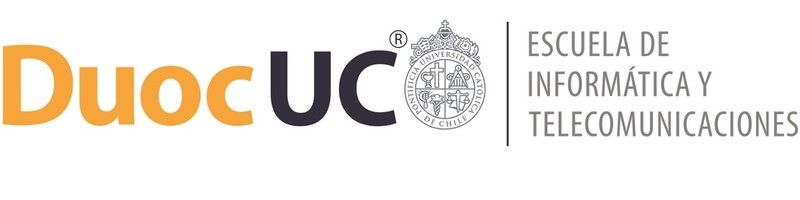

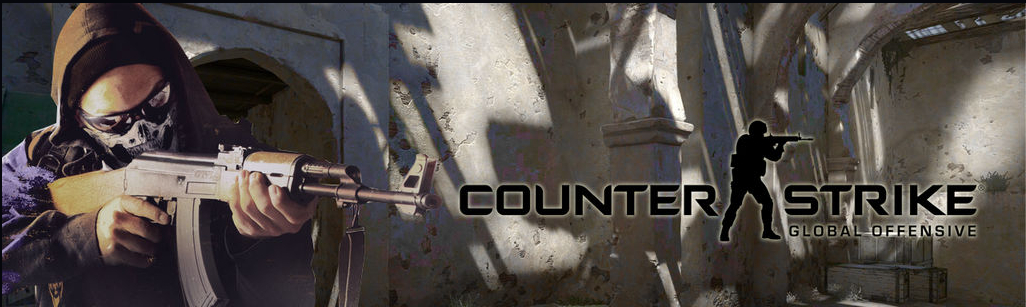

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: 
* Mario Bronchuer
* Bastian Calisto
* Carlos Solis

Docente: Michael Opitz Tampe.    

Sección: FMY0100 - 001D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO 

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan. 
 

El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  

 

En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego. 


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$



```
# Tiene formato de código
```

## Fase 3: Preparacion de datos

1.   Coeficiente de correlación por si solo entre las caracteristicas ✔
2.   Matriz de correlacion de Pearson ✔
3.   Interprtar valores obtenidos identificando valores de correlacin directa e inversa ✔
4.   Missing Values, datos outliers ✔
5.   Identificar caracteristicas significativas
6.   Transformacion de datos dependiendo de la naturaleza de estos  (Scaling, normalizacion o encoding)

# **Generación de la Hipótesis**



1.   Equipo que más gana
2.   Mapa con más porcentaje de victoria
3.   Mapa con más porcentaje de victoria en el equipo terrorista
4.   ¿Tener un rifle de asalto influye al final de la ronda?
5.   ¿Lanzar granadas influye en ganar la ronda?





In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios
# Se recomienda investigar sobre el contexto de negocio, sobre los datos 
# los campos en estadísticas de juegos, ver en qué se relacionan con los contenidos revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

Primero se importan las librerias para poder ocupar la

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importar librerias

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import seaborn as sb
import seaborn as sbn
from seaborn import load_dataset
import category_encoders as ce
from sklearn import preprocessing
from scipy.stats import norm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Importar datos
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
CSGO = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022 (1) (1).csv to Anexo ET_demo_round_traces_2022 (1) (1).csv


<ipython-input-6-6b91a184f118>:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  CSGO = pd.read_csv(name, sep=";")


1Hipotesis:
**El equipo terrorista gana más y que todos los jugadores matan por ronda**





---



In [ ]:
# 1.- Limpiar datos (normalización de datos, tratamiento de valores nulos,tratamiento de duplicados e imputación de datos)
# 2.- Modelado
    # a.- Elegir la tecnica de modelado (escoger la mas apropiada para el caso)
    # b.- Seleccionar datos con los que se trabajar (datos de entrenamiento y de prueba)
    # c.- obtener el modelo
# 3.- Evaluar el modelo
# 4 .-Implementación 
# 4 .- CRISP-DM

In [ ]:
#Sacamos el tamanno de los arreglos en cada dimension
CSGO.shape

(79157, 30)

In [ ]:
#Visualizamos las columnas existentes 
CSGO.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
CSGO.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
CSGO.info

<bound method DataFrame.info of        Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner MatchWinner  Survived  Abnor

In [ ]:
#Ejecutamos las siguiente liena de codigo para buscar los datos faltantes en nuestras columnas
CSGO.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
# Usaremos un método resumen de estadísticas descriptiva para que nos devuelva un dataframe y le agrefamos un .T para que el dataframe se muestre en filas en lugar de columnas
CSGO.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


In [ ]:
#CHEQUEAMOS SI HAY DATOS FALTANTES
CSGO.columns[CSGO.isnull().any()]

Index(['Team', 'MatchWinner'], dtype='object')

In [ ]:
#Eliminaremos la columna 'unamed: 0' ya que son datos la cual no necesitaremos para tener un mejor analisis del caso 
CSGO.columns
CSGO2=CSGO.drop(['Unnamed: 0'],axis=1)

In [ ]:
CSGO2.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
CSGO2.Map.value_counts()

de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: Map, dtype: int64

In [ ]:
CSGO2_ce = CSGO2.copy()
CSGO2_he = CSGO2.copy()
CSGO2_le = CSGO2.copy()

In [ ]:
CSGO2_he['de_inferno'] = CSGO2_he['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[1,0,0,0])
CSGO2_he['de_dust2'] = CSGO2_he['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,1,0,0])
CSGO2_he['de_mirage '] = CSGO2_he['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,1,0])
CSGO2_he['de_nuke'] = CSGO2_he['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,0,1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Datos de ejemplo
CSGO2_he = pd.DataFrame({'Map': ['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke', 'de_dust2']})

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna 'Map'
CSGO2_he['Map_LabelEncoded'] = label_encoder.fit_transform(CSGO2_he['Map'])

# Mostrar los datos transformados
print(CSGO2_he)

          Map  Map_LabelEncoded
0  de_inferno                 1
1    de_dust2                 0
2   de_mirage                 2
3     de_nuke                 3
4    de_dust2                 0


In [ ]:
CSGO2_he.sample(4)

,Map,Map_LabelEncoded
1,de_dust2,0
2,de_mirage,2
4,de_dust2,0
0,de_inferno,1


In [ ]:
for Maps in CSGO2_he['Map'].unique():
    CSGO2_he[Maps] = np.where(CSGO2_he['Map'] == Maps, 1, 0)

CSGO2_he.sample(4)

,Map,Map_LabelEncoded,de_inferno,de_dust2,de_mirage,de_nuke
1,de_dust2,0,0,1,0,0
4,de_dust2,0,0,1,0,0
3,de_nuke,3,0,0,0,1
0,de_inferno,1,1,0,0,0


In [ ]:
#Utilizamos esta funcion para filtar las siguientes columnas RoundKills, RoundAssists, RoundHeadshots y RoundFlankKills que tengan un valor 0
#Para asi poder visualizar los datos que no son relevantes para el modelo
CSGO2.query('RoundKills<26')

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,340.272.074.099.723,...,0,0,0,0,5600,27100,4,0,2,2
79153,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,2.926.105.436.288.080,...,1,0,1,0,5500,27100,8,5,1,3
79154,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,5.914.717.797.783.930,...,0,0,0,0,4950,27100,5,0,2,3
79155,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,42.582.842.797.783.900,...,0,0,0,0,4950,27100,1,0,1,0


In [ ]:
#Ultizamos la funcion corr() para calcular la correlacion entre la columnas de nuestro nuevo data frame(CSGO2)
#Luego se ordenamos la columna "RoundId" de la matriz de correlación en orden descendente para asi identificar las varibales que estan mas correlacionadas con "RoundId"
#y poder seleccionar la variable mas importante para el modelo

#Como podemos ver "RoundId" tiene una correlacion directa con todos los datos que se muestran de forma positiva por otro lado los datos que se muestran de forma negativa nos demuestra que tienen una correlacion inversa con "RoundId"
corr_matrix = CSGO2.corr()*100
corr_matrix["RoundId"].sort_values(ascending=False)

<ipython-input-24-c2e34c26ed80>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = CSGO2.corr()*100


RoundId                        100.000000
MatchKills                      80.750129
MatchHeadshots                  68.822117
MatchAssists                    58.853500
MatchFlankKills                 50.927702
TeamStartingEquipmentValue      12.741985
RoundStartingEquipmentValue     11.760629
PrimaryAssaultRifle              8.589226
RNonLethalGrenadesThrown         7.331441
RLethalGrenadesThrown            6.532692
PrimarySniperRifle               2.629052
RoundFlankKills                  1.033150
RoundKills                       0.913422
MatchId                          0.147615
InternalTeamId                  -0.000810
RoundAssists                    -0.250272
RoundHeadshots                  -0.334410
PrimaryHeavy                    -0.397459
Survived                        -1.536068
PrimarySMG                      -2.985998
PrimaryPistol                  -10.701292
AbnormalMatch                         NaN
Name: RoundId, dtype: float64

 1.   Correlacion directa: Si el resultado es mayor  a uno significa que es una 
correlacion directa, entonces se puede estimar que:


RoundId                        100.000000,
MatchKills                      80.521472,
MatchHeadshots                  67.808622,
MatchAssists                    57.297555,
MatchFlankKills                 49.120963,
TeamStartingEquipmentValue      13.080859,
RoundStartingEquipmentValue     12.154632,
RNonLethalGrenadesThrown         7.331310,
RLethalGrenadesThrown            6.928365,
PrimaryAssaultRifle              6.882514,
PrimarySniperRifle               3.197919,
RoundFlankKills                  1.153709,
RoundKills                       0.650958,
MatchId                          0.060661, tienen un correlacion directa.

2.   Correlacion inversa si el resultado es cercano es a -1 significa que es una correlacion inversa,entonces se puede estimar que:PrimaryHeavy                    -0.346904,
RoundAssists                    -0.798236,
RoundHeadshots                  -1.161361,
Survived                        -1.831408,
PrimarySMG                      -3.138832,
InternalTeamId                  -6.531988,
PrimaryPistol                  -10.461127, tienen correlacion inversa.







<ipython-input-25-a11f5d230029>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = CSGO2.corr()


<Axes: >

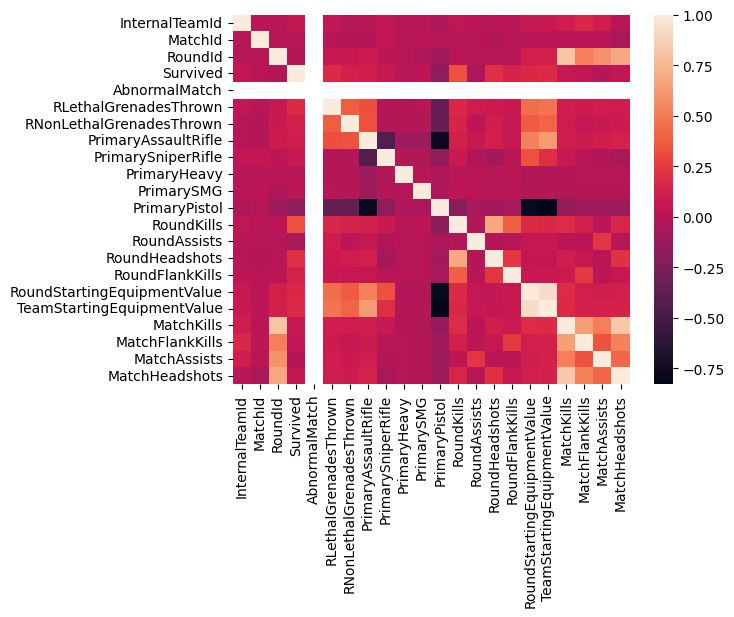

In [ ]:
corr_matrix = CSGO2.corr()
sns.heatmap(corr_matrix)

<ipython-input-26-3e2f59fb78a1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CSGO2['MatchHeadshots'])


<Axes: xlabel='MatchHeadshots', ylabel='Density'>

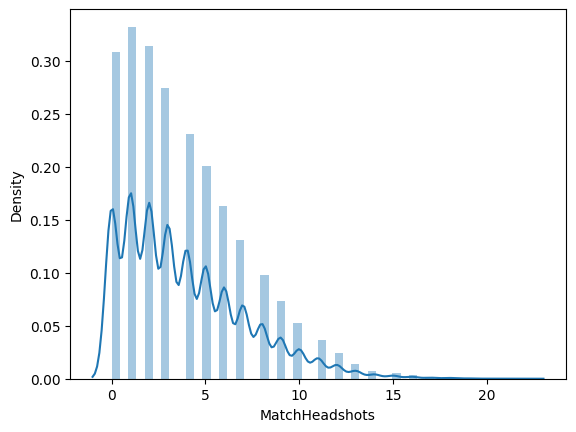

In [ ]:
sns.distplot(CSGO2['MatchHeadshots'])

In [ ]:
CSGO2.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
for columna in CSGO2.columns:
    print('\nEstadísticos de la columna {0}'.format(columna))
    print(CSGO2[columna].isna().sum())


Estadísticos de la columna Map
0

Estadísticos de la columna Team
2

Estadísticos de la columna InternalTeamId
0

Estadísticos de la columna MatchId
0

Estadísticos de la columna RoundId
0

Estadísticos de la columna RoundWinner
0

Estadísticos de la columna MatchWinner
1

Estadísticos de la columna Survived
0

Estadísticos de la columna AbnormalMatch
0

Estadísticos de la columna TimeAlive
0

Estadísticos de la columna TravelledDistance
0

Estadísticos de la columna RLethalGrenadesThrown
0

Estadísticos de la columna RNonLethalGrenadesThrown
0

Estadísticos de la columna PrimaryAssaultRifle
0

Estadísticos de la columna PrimarySniperRifle
0

Estadísticos de la columna PrimaryHeavy
0

Estadísticos de la columna PrimarySMG
0

Estadísticos de la columna PrimaryPistol
0

Estadísticos de la columna FirstKillTime
0

Estadísticos de la columna RoundKills
0

Estadísticos de la columna RoundAssists
0

Estadísticos de la columna RoundHeadshots
0

Estadísticos de la columna RoundFlankKills
0

E

In [ ]:
CSGO2.query('MatchKills>25')

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
631,de_inferno,CounterTerrorist,1,9,25,False,False,True,False,54.353.410.833.777.000,...,2,0,0,1,7450,29250,26,2,6,14
1425,de_dust2,Terrorist,2,13,20,True,True,True,False,11.462.884.949.639.000,...,4,0,0,0,6750,24550,26,6,1,10
1435,de_dust2,Terrorist,2,13,21,True,True,False,False,5.105.739.147.874.140,...,1,0,1,0,4400,15550,27,6,1,11
1445,de_dust2,Terrorist,2,13,22,False,True,False,False,59.379.245.727.114.700,...,1,0,1,1,4200,15500,28,7,1,12
1455,de_dust2,Terrorist,2,13,23,True,True,False,False,5.393.562.678.269.000,...,1,1,0,0,5950,23200,29,7,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78804,de_nuke,Terrorist,2,509,27,False,False,True,False,9.090.561.714.944.880,...,1,0,0,0,6850,25950,28,4,2,8
79072,de_inferno,Terrorist,2,510,27,True,False,False,False,8.870.076.373.214.210,...,1,0,1,0,200,3700,26,1,7,15
79082,de_inferno,Terrorist,2,510,28,True,False,False,False,52.544.881.195.345.100,...,0,0,0,0,200,1000,26,1,7,15
79092,de_inferno,Terrorist,2,510,29,True,False,True,False,9.332.971.755.173.200,...,0,0,0,0,4400,22300,26,1,7,15


<Axes: xlabel='RoundId', ylabel='MatchKills'>

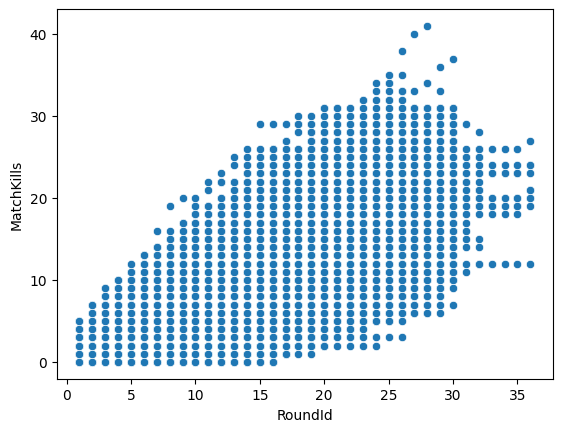

In [ ]:
# Crear el histograma con RoundId y MatchKills
sb.scatterplot(x=CSGO2.RoundId , y=CSGO2.MatchKills)

<ipython-input-31-08d9c8681c43>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(CSGO2.MatchKills)


<Axes: xlabel='MatchKills', ylabel='Density'>

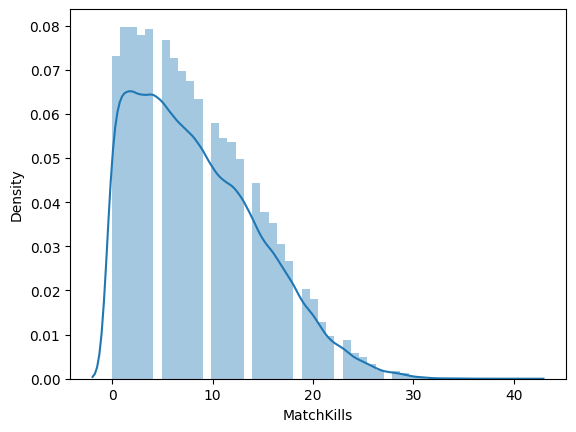

In [ ]:
sb.distplot(CSGO2.MatchKills)

In [ ]:
#consultar los datos que borraremos
CSGO2.query('MatchKills>25')

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
631,de_inferno,CounterTerrorist,1,9,25,False,False,True,False,54.353.410.833.777.000,...,2,0,0,1,7450,29250,26,2,6,14
1425,de_dust2,Terrorist,2,13,20,True,True,True,False,11.462.884.949.639.000,...,4,0,0,0,6750,24550,26,6,1,10
1435,de_dust2,Terrorist,2,13,21,True,True,False,False,5.105.739.147.874.140,...,1,0,1,0,4400,15550,27,6,1,11
1445,de_dust2,Terrorist,2,13,22,False,True,False,False,59.379.245.727.114.700,...,1,0,1,1,4200,15500,28,7,1,12
1455,de_dust2,Terrorist,2,13,23,True,True,False,False,5.393.562.678.269.000,...,1,1,0,0,5950,23200,29,7,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78804,de_nuke,Terrorist,2,509,27,False,False,True,False,9.090.561.714.944.880,...,1,0,0,0,6850,25950,28,4,2,8
79072,de_inferno,Terrorist,2,510,27,True,False,False,False,8.870.076.373.214.210,...,1,0,1,0,200,3700,26,1,7,15
79082,de_inferno,Terrorist,2,510,28,True,False,False,False,52.544.881.195.345.100,...,0,0,0,0,200,1000,26,1,7,15
79092,de_inferno,Terrorist,2,510,29,True,False,True,False,9.332.971.755.173.200,...,0,0,0,0,4400,22300,26,1,7,15


In [ ]:
CSGO2.query('MatchKills>25').index

Int64Index([  631,  1425,  1435,  1445,  1455,  1644,  1654,  1664,  1674,
             1684,
            ...
            78366, 78376, 78386, 78784, 78794, 78804, 79072, 79082, 79092,
            79102],
           dtype='int64', length=611)

In [ ]:
#Eliminamos los datos anteriormente buscados en nustro dataframe(CSGO2)
CSGO2.drop(CSGO2.query('MatchKills>25').index, inplace=True)

In [ ]:
CSGO2["ProbHeadshots"] = CSGO.MatchKills / CSGO.MatchHeadshots
CSGO2.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,ProbHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,...,0,0,0,750,4400,0,0,0,0,NaN
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,...,0,0,0,800,4400,0,0,0,0,NaN
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,...,0,0,0,1000,4400,0,0,0,0,NaN
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,...,0,0,0,850,4400,0,0,0,0,NaN
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,...,0,0,0,1000,4400,0,0,0,0,NaN


In [ ]:
CSGO2 = CSGO2.dropna(subset=['ProbHeadshots'])

In [ ]:
CSGO2.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,ProbHeadshots
8,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,1,1,850,3750,3,1,0,1,3.0
9,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,2,0,850,3750,2,0,0,2,1.0
15,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,2,0,4300,19950,3,0,0,2,1.5
17,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,1,0,3550,19950,1,0,1,1,1.0
18,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,0,0,4500,19950,4,1,0,1,4.0


In [ ]:
# Creación de variables Dummy
CSGO2.Team.unique()

array(['CounterTerrorist', nan, 'Terrorist'], dtype=object)

In [ ]:
CSGO2.Team.replace({"CounterTerrorist":2,"Terrorist":1}, inplace=True)
CSGO2.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,ProbHeadshots
8,de_inferno,2.0,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,1,1,850,3750,3,1,0,1,3.0
9,de_inferno,2.0,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,2,0,850,3750,2,0,0,2,1.0
15,de_inferno,2.0,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,2,0,4300,19950,3,0,0,2,1.5
17,de_inferno,2.0,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,1,0,3550,19950,1,0,1,1,1.0
18,de_inferno,2.0,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,0,0,4500,19950,4,1,0,1,4.0


In [ ]:
CSGO2.Map.unique()

array(['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2'], dtype=object)

In [ ]:
CSGO2.Map.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)
CSGO2.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,ProbHeadshots
8,1,2.0,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,1,1,850,3750,3,1,0,1,3.0
9,1,2.0,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,2,0,850,3750,2,0,0,2,1.0
15,1,2.0,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,2,0,4300,19950,3,0,0,2,1.5
17,1,2.0,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,1,0,3550,19950,1,0,1,1,1.0
18,1,2.0,2,4,2,False,False,True,False,5.287.222.815.345.200,...,0,0,0,4500,19950,4,1,0,1,4.0


In [ ]:
# Separamos en Train y Test
X = CSGO2.drop(["Team"], axis=1)
X.head()

,Map,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,ProbHeadshots
8,1,2,4,1,True,False,True,False,5.312.251.089.027.310,8.772.206.210.917.240,...,0,1,1,850,3750,3,1,0,1,3.0
9,1,2,4,1,True,False,True,False,5.312.251.089.027.310,7.849.180.428.641.930,...,0,2,0,850,3750,2,0,0,2,1.0
15,1,2,4,2,False,False,True,False,5.287.222.815.345.200,6.573.500.173.193.060,...,0,2,0,4300,19950,3,0,0,2,1.5
17,1,2,4,2,False,False,True,False,5.287.222.815.345.200,63.335.001.497.729.300,...,0,1,0,3550,19950,1,0,1,1,1.0
18,1,2,4,2,False,False,True,False,5.287.222.815.345.200,5.389.651.970.334.480,...,0,0,0,4500,19950,4,1,0,1,4.0


In [ ]:
y = CSGO2["Team"]
y.head()

8     2.0
9     2.0
15    2.0
17    2.0
18    2.0
Name: Team, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **Conclusión de la Hipótesis**
Se puede concluir que el equipo que mas gana es el equipo terrorista, a su vez el mapa con mas porcentaje de victoria es mirage, tambien se estima que el mapa con mas porcentaje de victoria en el equipo terrorista es en mirage. Se asocia que tener un rifle de asalto durante una ronda implica una mayor chance de lograr la victoria de la ronda gracias a la diferencia de daño.

Finalmente lanzar granadas durante la ronda influye directamente en la victoria de esta misma dado que te da un ventaja significativa en el control de mapa.




# **FASE 4**

Regresión logística


In [ ]:
from sklearn import linear_model #Regresion logistica

In [ ]:
print(CSGO2.groupby('Team').size())

Team
1.0    36624
2.0    37180
dtype: int64


ValueError: ignored

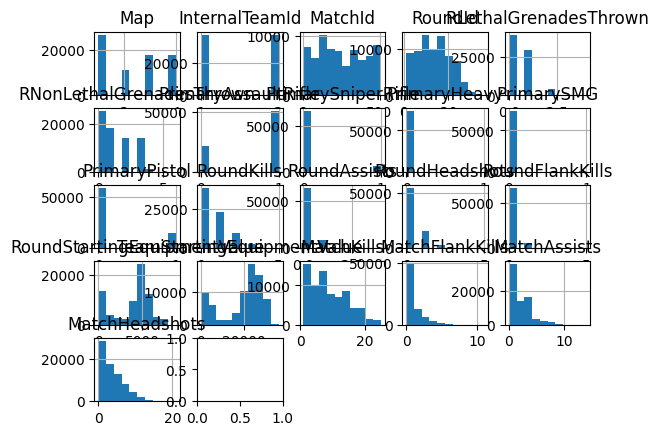

In [ ]:
#Visualizamos los datos
CSGO2.drop(['Team'], axis=1).hist()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


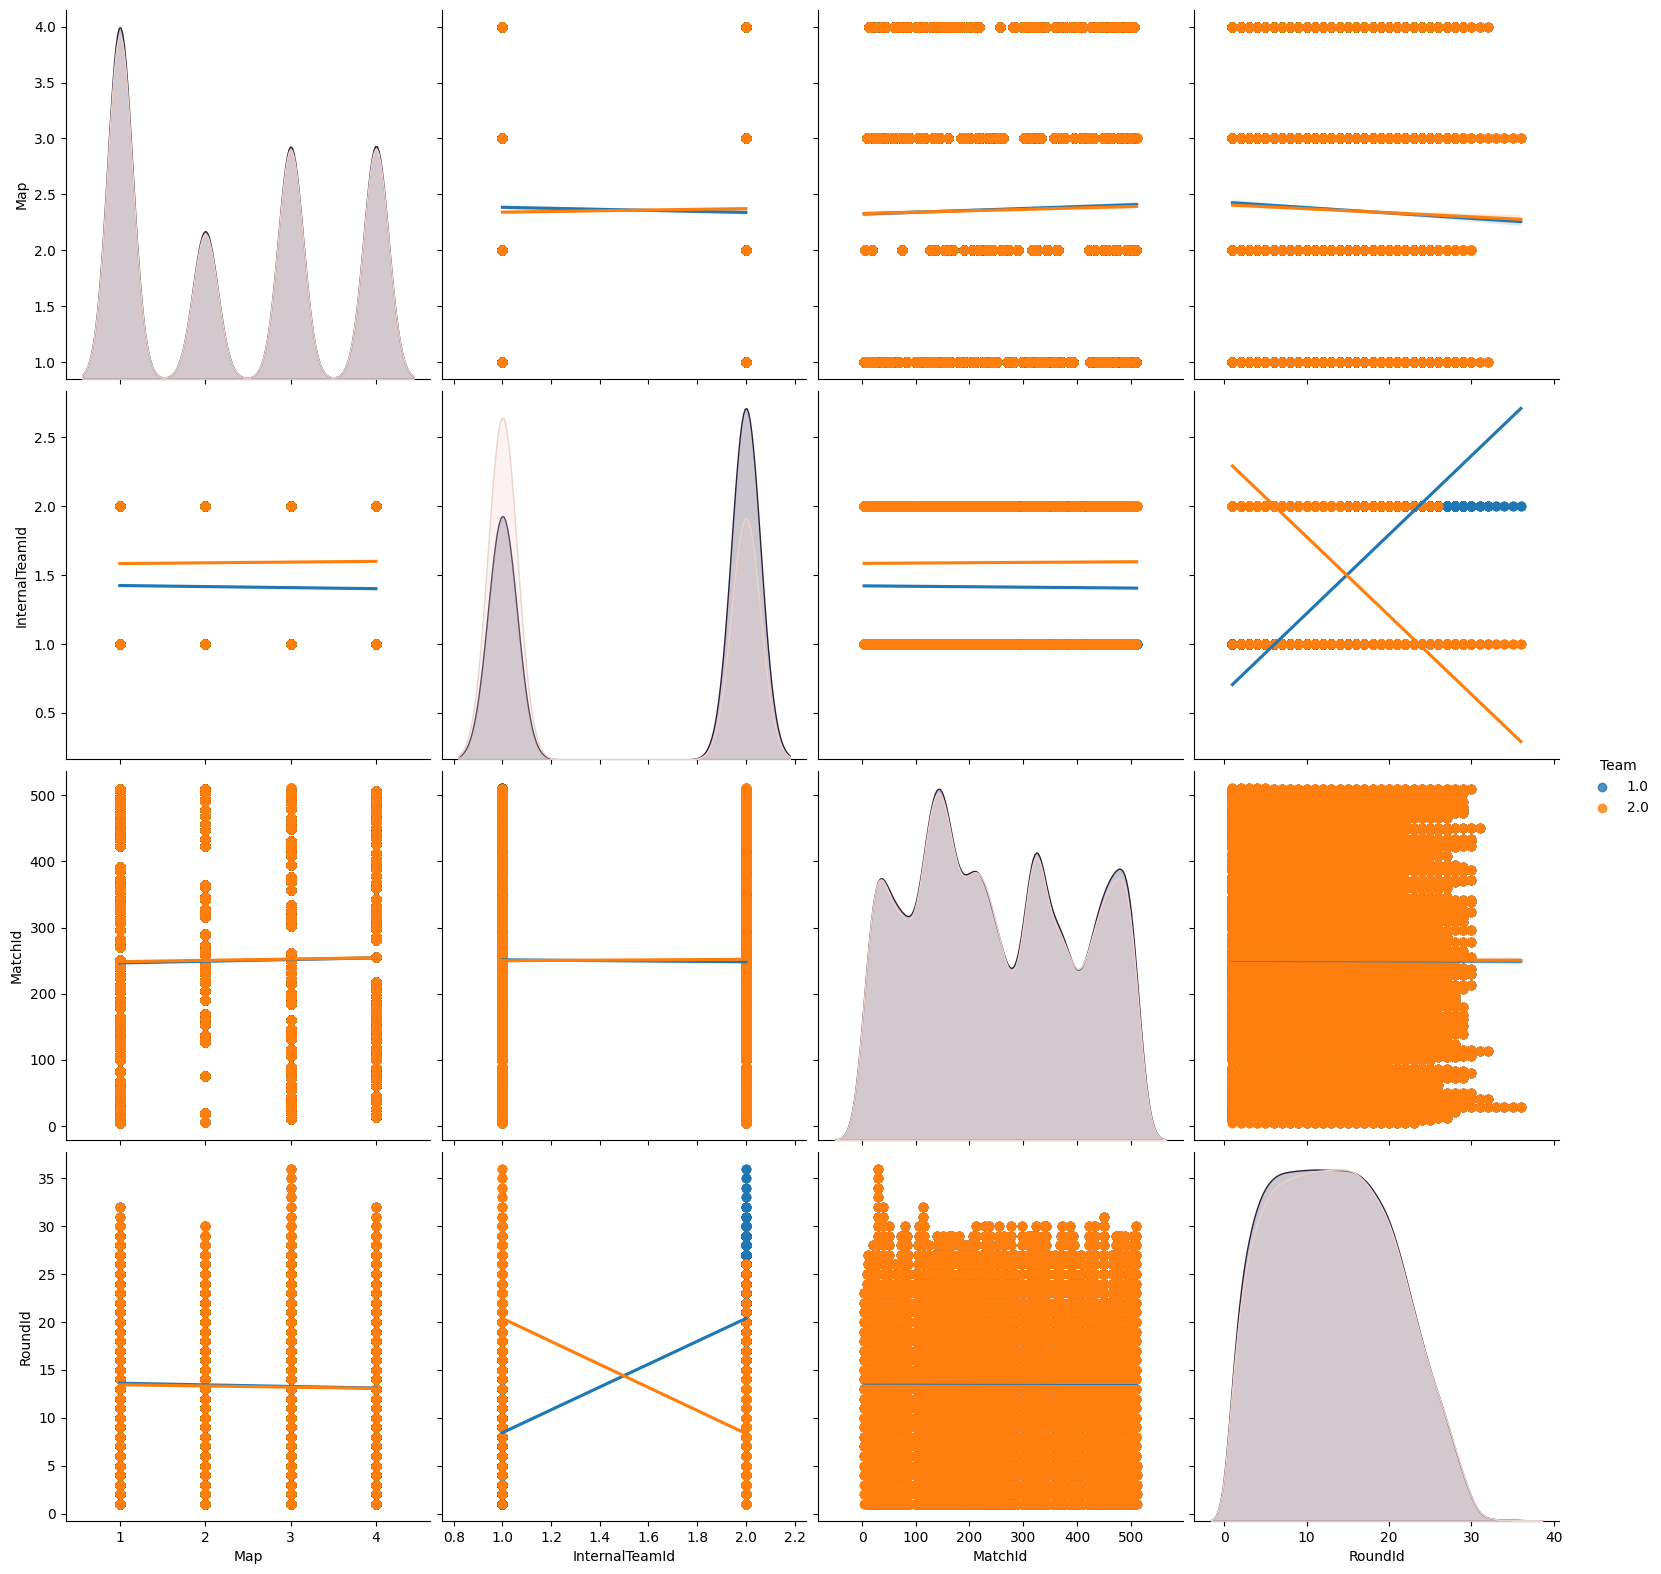

In [ ]:
sb.pairplot(CSGO2.dropna(), hue='Team',size=4,vars=["Map", "InternalTeamId","MatchId","RoundId"],kind='reg') #Kind es para darle diseño

In [ ]:
#Se hae esto para llevarla despues al modelo y prepararlo para las pruebas
X = np.array(CSGO2.drop(['Team'],1))
y = np.array(CSGO2['Team'])
X.shape

<ipython-input-172-2b314b49889e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(CSGO2.drop(['Team'],1))


(73805, 29)

In [ ]:
CSGO2['Team'] = pd.to_numeric(CSGO2['Team'], errors='coerce')

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

ValueError: ignored